# Bagging

# what is bagging
* Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once


* Bagging is used when the goal is to reduce the variance of a decision tree classifier. Here the objective is to create several subsets of data from training sample chosen randomly with replacement. Each collection of subset data is used to train

![](bag.png)


**Output side called as  Aggregation**

**For regression task it will take average**



**For classification it will count the output** 

## How bagging works

#### Bootstrapping:
*  Bagging leverages a bootstrapping sampling technique to create diverse samples. This resampling method generates different subsets of the training dataset by selecting data points at random and with replacement. This means that each time you select a data point from the training dataset, you are able to select the same instance multiple times. As a result, a value/instance repeated twice (or more) in a sample.

#### Parallel training:
* These bootstrap samples are then trained independently and in parallel with each other using weak or base learners.

#### Aggregation:
* Finally, depending on the task (i.e. regression or classification), an average or a majority of the predictions are taken to compute a more accurate estimate. In the case of regression, an average is taken of all the outputs predicted by the individual classifiers; this is known as soft voting. For classification problems, the class with the highest majority of votes is accepted; this is known as hard voting or majority voting.

## Benefits :

#### Ease of implementation: 
* Python libraries such as scikit-learn (also known as sklearn) make it easy to combine the predictions of base learners or estimators to improve model performance.

#### Reduction of variance:
* Bagging can reduce the variance within a learning algorithm. This is particularly helpful with high-dimensional data, where missing values can lead to higher variance, making it more prone to overfitting and preventing accurate generalization to new datasets.


## challenges of bagging:


#### Computationally expensive:
* Bagging slows down and grows more intensive as the number of iterations increase. Clustered systems or a large number of processing cores are ideal for quickly creating bagged ensembles on large test sets.



## First we will see Using single model

## Business case: Predicting  quality of wine with given feature.

In [1]:
#importing package and loading data
import pandas as pd
import numpy as np
data=pd.read_csv('wine.csv')

### Domain Analysis
#### Checking Impact Of All Parameter To Wine
* Alcohol:-Alcohol content affects aroma and taste in critical ways, and the sugar content of the grapes determines alcohol content.

* Malic acid:-Malic acid is very important in wine. If there is not enough, the wine will taste “flat,” and will be more susceptible to spoilage. If there is too much, the wine will taste “green,” or “sour.” 

* Ash:-Ash content is one of the important indicators in wine quality determination. The conventional gravimetric method for ash quantity determination is time consuming. As conductivity is primarily dependent on mineral content, its value (from 7276 to 3460 μS/cm)

* Alcalinity of ash:-Alkalinity of ash measures the basicity (alkalinity) of the ash obtained from a sample. This is accomplished by adding acid to the ash until the solution is neutralized.

* Magnesium:-magnesium is a stress-protectant factor in the case of wine, brewing and distilling yeasts and can help to prevent cell death caused by temperature shock and ethanol toxicity.

* Total phenols:-Phenols do not only affect taste. They also give red wine color, and act as a preservative during the aging process. Most phenols exist in the form of tannins. These molecules help to preserve wine by their ability to absorb oxygen.

* Flavanoids:-Flavanoids are the major phenolic group in red wine, and have a profound impact on wine taste. The major flavanoids in wine are flavanols, anthocyanins and catechins. They can exist in multiple forms; by themselves or polymerized with sugars, other flavanoids and or nonflavanoids.

* Nonflavanoid phenols:-Nonflavanoids are the primary contributor to the color white wine. Compared to color in red wine, the chemical nature of color in white wine is not very well understood. The majority of the phenols in white wine are nonflavanoid hydroxycinamates. These include caftaric acid, coumaric acid and ferulic acid.

* Proanthocyanins:- Pyranoanthocyanins are not subject to bleaching and range in color from red-orange to yellow to blue. While wine contains relatively low concentrations of these compounds, they are believed to be important contributors to the color of aged wine.

* Color intensity:- The pigment in red wine is sensitive to both temperature and sulfites. Wines that are fermented at high temperatures or have higher sulfur additions will have less color intensity.

* Hue:-The hue in red wine is partially affected by the pH level of the wine. There are many variables that will affect the color (such as co-pigmentation, sulfur additions, etc.) but the following is generally true: Wines with a strong red hue have a lower pH (high acidity). Wines with a strong violet hue range from around 3.4–3.6 pH (on average).

* OD280/OD315 of diluted wines:-The higher absorbance ratio of OD280/OD315 indicates high protein purity. Therefore the first common factor can be named the bitter trophic factor of wine. The second common factor has a large load on the variables of alcohol, color intensity and proline.

* Proline:-Proline is typically the most abundant amino acid present in grape juice and wine. The amount present is influenced by viticultural and winemaking factors and can be of diagnostic importance.



# Basic check

In [2]:
data.head()#first five rows

,wine,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data.wine.value_counts()

In [ ]:
data.tail()#last 5 rows

In [ ]:
data.info()# to know datatype and null count

In [ ]:
data.describe()#used to view some basic statistical details like percentile, mean, std etc. 

In [ ]:
#data.describe(include='O')#It will give you info about categorical data/columns

In [ ]:
data.shape#rows and columns

In [ ]:
data.wine.value_counts()

# EDA

### Renaming the columns

In [3]:
data.rename(columns={'Wine':'wine','Alcohol':'alcohol','Alcalinity of ash':'AOA','Total phenols':'total_phe',
                     'Nonflavanoid phenols':'NOP','Color intensity':'color_intensity','Hue':'hu',
                     'OD280/OD315 of diluted wines':'DW','Malic acid':'M_acid'},inplace=True)
#renaming all columns

In [4]:
#importing package
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#creation of data frame which continuous variable
box=data[['alcohol','M_acid','Ash','AOA','Magnesium','total_phe','Flavanoids','NOP','Proanthocyanins','color_intensity','hu','DW','Proline']]

## Univariate Analysis

In [ ]:
plt.figure(figsize=(25,25),facecolor='white')#canvas size
plotnum=1#counter
for c in box:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.histplot(box[c])#to know distribution
    plotnum+=1#increment counter
plt.tight_layout()    

## Uni-variate Analysis Observation:

### Alcohol : 
* The range of alcohol content in wine between 11.0 to 14.7
* Most count of alcohol content in wine between 12 to 14

### Malic acid:
* 1.5 is most count of malic acid (total 60).
* The range of malic acid between 1 to 5.5

### Ash:
* Most count of ash content in wine 2.25 to 2.75
* The range of ash content in wine between 1 to 3.25

### Alcalinity of Ash:
* Higher count of Alcalinity of ash between 17.5 to 20.0
* The Maximum Alcanity of ash is 30.0 & minimum alcalinity of ash is 10.5

### Magnesium:
* Maximum no of magnesium in wine is 90
* The range of magnesium between 70 to 160

### Total phenols:
* Maximum phenols is 3.8 & Minimum phenols is 1.0
* 2.7 is most phenols count

### Flavanoids:
* The flavanoids in wine range between 0.5 to 3
* The highest flavanoids in wine is 5.0

### Nonflavanoid phenols:
* 0.3 is Highest count in nonflavanoid phenols 
* The range of nonflavanoid phenols is 0.1 to 0.7

# Bivariant Anaylsis

In [ ]:
# Task:-Get the insights from bivairate analysis

In [ ]:
plt.figure(figsize=(25,25),facecolor='white')#canvas size
plotnum=1#counter
for c in box:#columns form dataFrame
    if(plotnum<9):#checking whether counter less than 9
        a=plt.subplot(4,2,plotnum)#plotting 8 graph
        sns.histplot(x=box[c],hue=data.wine,cbar=True,palette='husl')#to know relation between target and variable
    plotnum+=1#increment counter
plt.tight_layout()    

## Bivariate & Multivariate Analysis Observation:

### Impact of Alcohol in wine:
* Most Alcohol content wine is class 1 & class 3.
* If alcohol content less than 13% the wine is class 2

### Impact of Malic acid in wine:
* All class (grade)wine are same malic acid in wine.
* But 1% malic acid mojority wine belong to class 2.

### Ash:
* Majority of class 2 wine ash between 1.25 to 2.75 
* If ash more than (2-3.25) all classes wine are present.

### Alcalinity of ash:
* Less than 17.5 alcalinity of ash majority wine belong to class 1 & 3
* If the wine alcalinity of ash more than 20.0 the wine belon to class 2.

### Magnesium:
* Maximum and minimum magnesium content wine belong to class 2.
* The magnesium content wine range between 100 to 120 belong to all 3 classes.

### Total phenols:
* If the phenols is high in wine majority wine belong to class 1 & 3
* In class 1 all phenols point are included.

### Flavanoids:
* Maximum and minimum falvanoid belong to class 1 & class 2

### Nonflavanoid phenols:
* If nonflavanoid phenols is increses majority wine belog to class 1 & class 2
* 0.2 & 0.3 nonflavanoid phenols in wine belong to all classes.


# Data preprocessing

# 1.checking null values 

In [ ]:
data.info()

In [ ]:
data.isnull().sum()

## 2.conversion of categorical columns into numerical columns

In [ ]:
data.info()

In [6]:
for c in data.columns:#columns form datasets
    if(data[c].dtype==object):#checking datatype of labels
        print(c)  #categorical columns



## 3.checking outlier

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

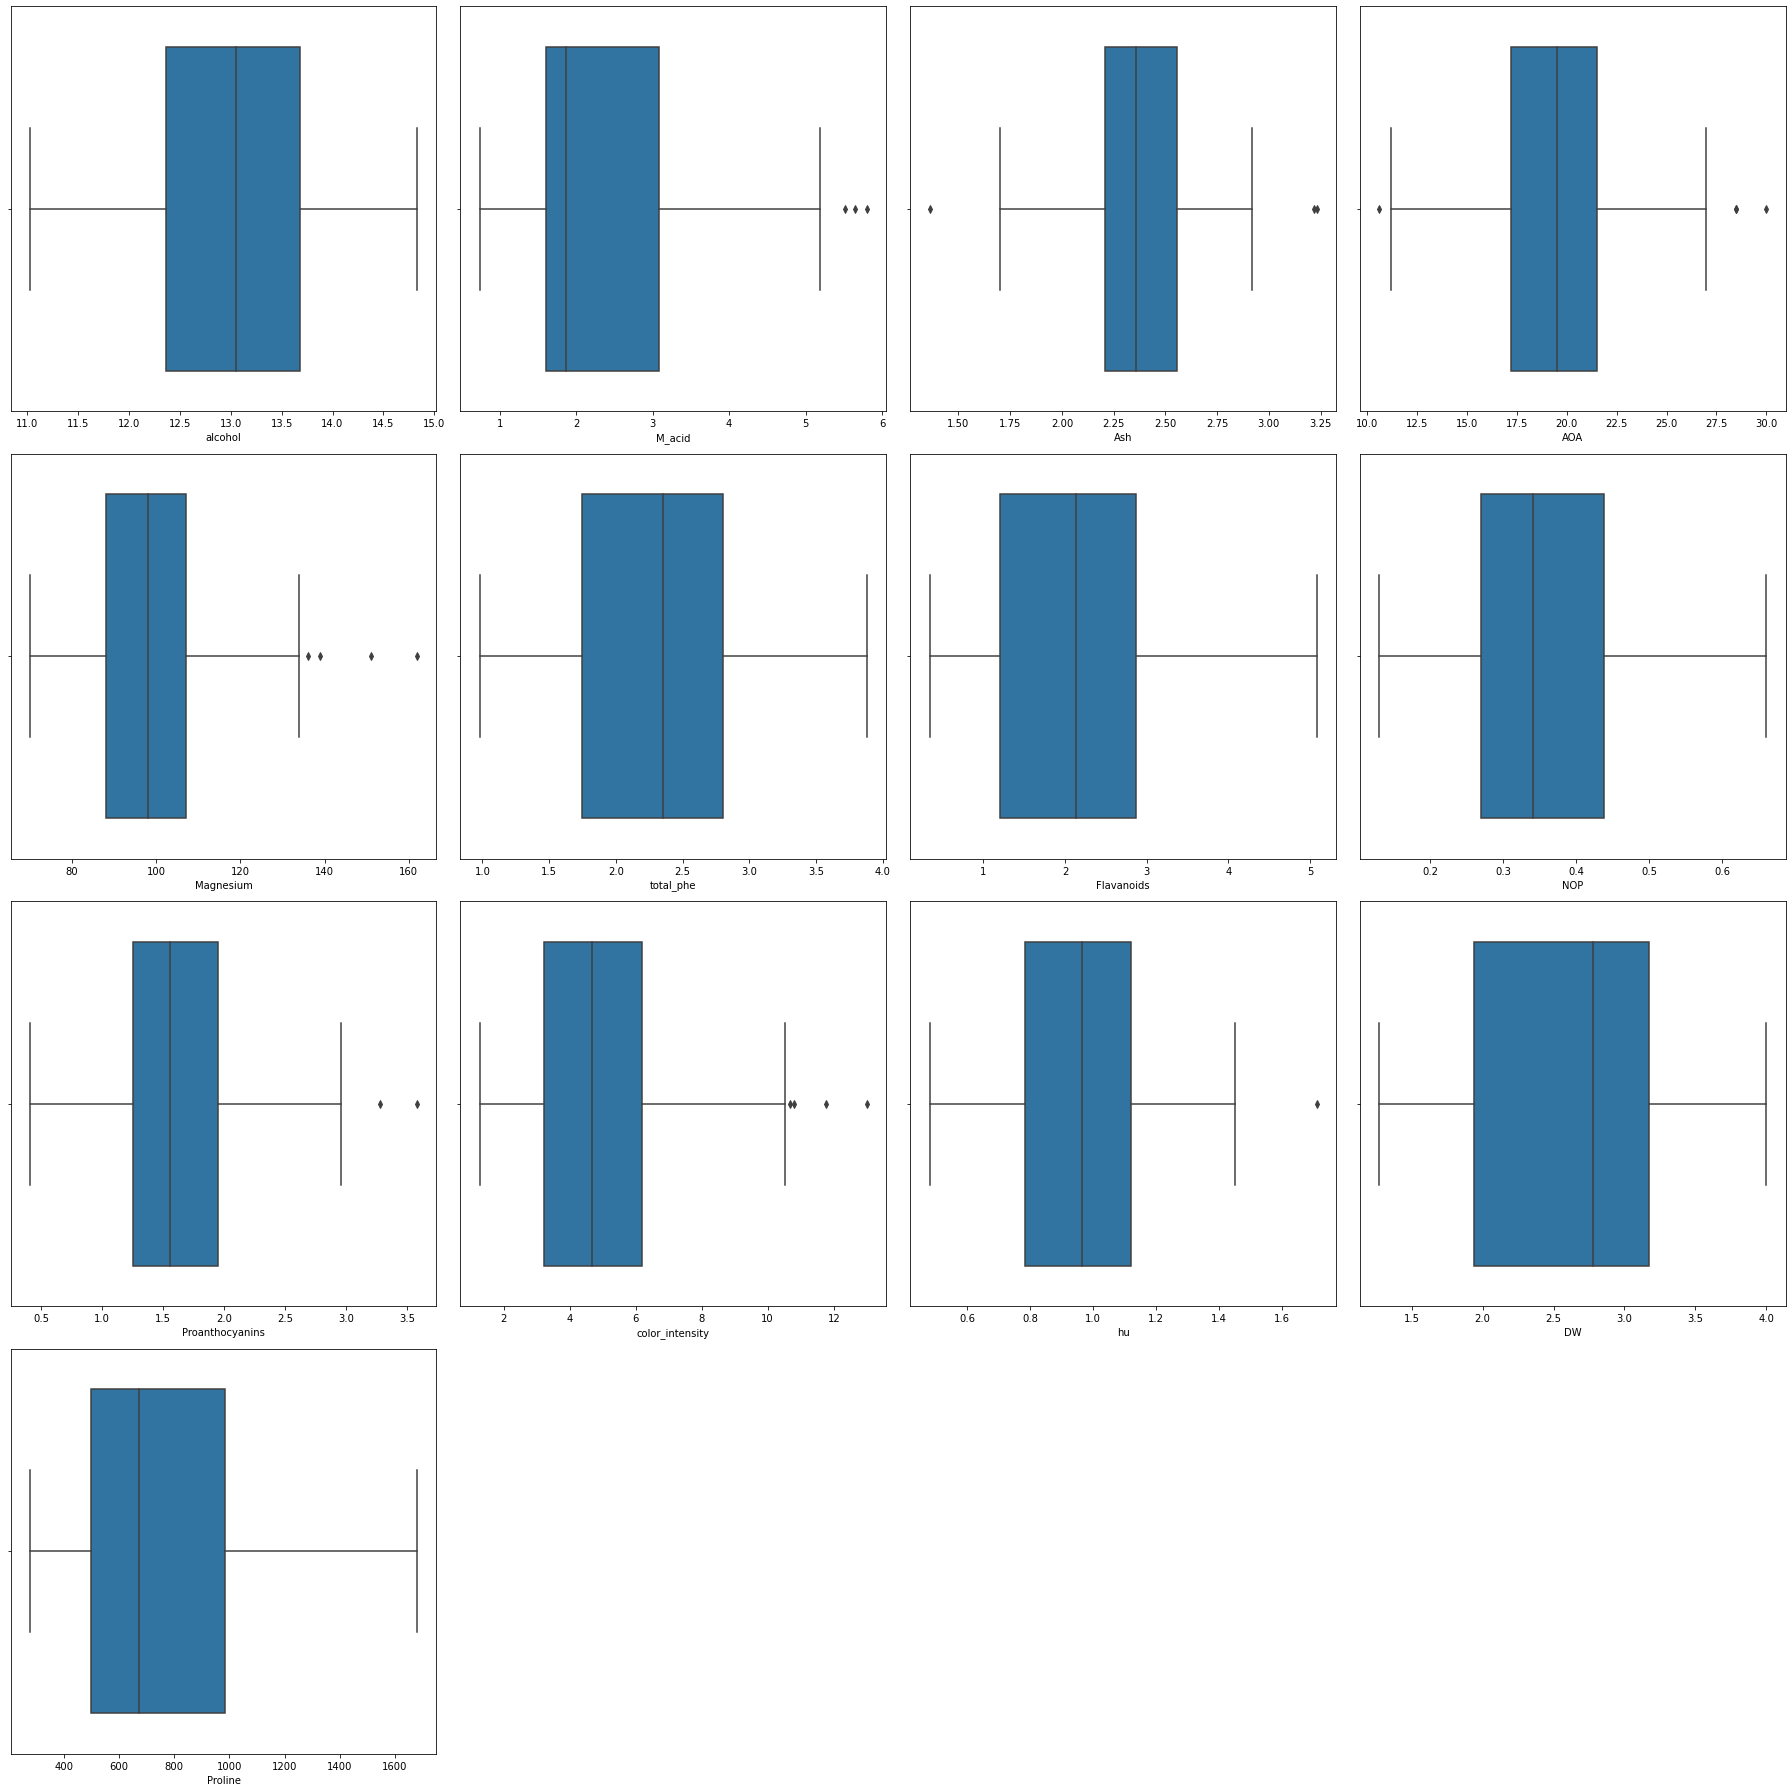

In [7]:
plt.figure(figsize=(25,25),facecolor='white')
plotnum=1
for c in box:
    if(plotnum<14):
        ax=plt.subplot(4,4,plotnum)
        sns.boxplot(box[c])
    plotnum+=1
plt.tight_layout()

# Outlier Handling

# M_acid

In [8]:
#outlier handling for M_acid and its not a normal so we use IQR range
from scipy import stats#import stats to calculat mod


In [9]:
IQR = stats.iqr(data.M_acid, interpolation = 'midpoint') #calculating Inter quantile range

IQR

1.46

In [10]:
Q1=data.M_acid.quantile(0.25)#defining 25% of data
Q3=data.M_acid.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR#setting minimum limit


max_limit=Q3 + 1.5*IQR#setting maximum limit


In [11]:
print(min_limit,max_limit)

-0.5874999999999999 5.2725


In [12]:
data.loc[data['M_acid']<min_limit] #checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [13]:
data.loc[data['M_acid']>max_limit]#checking values which are greater than maximum limit


,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.6,0.73,3.10,380
137,3,12.53,5.51,2.64,25.0,96,1.79,0.60,0.63,1.10,5.0,0.82,1.69,515
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740


In [14]:
data.loc[data['M_acid']>max_limit,'M_acid']=np.median(data.M_acid)#imputing value with median

In [15]:
np.median(data.M_acid)

1.8625000000000003

In [16]:
data.loc[data['M_acid']>max_limit]#checking whether outlier remove or not

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


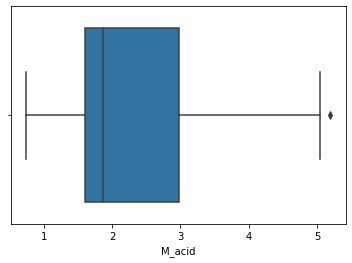

In [17]:
sns.boxplot(data.M_acid)#boxplot to check outlier
plt.show()

In [18]:
# Calculate the IQR range on new data.

# Ash

### Using 3 sigma rule

In [19]:
# for ash we will use 3 sigma rule 
lower_limit=data.Ash.mean() - 3*data.Ash.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Ash.mean() + 3*data.Ash.std()#calculating upper limit
upper_limit

1.543484826750141


3.1895488811150297

In [20]:
data.loc[data['Ash']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520


In [21]:
data.loc[data['Ash']<lower_limit,'Ash']=np.mean(data.Ash)

In [22]:
data.loc[data['Ash']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [23]:
data.loc[data['Ash']>upper_limit]#checking values which are greater than maximum limit

 

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465


In [24]:
data.loc[data['Ash']>upper_limit,'Ash']=np.mean(data.Ash)#imputing value with mean

In [25]:
data.loc[data['Ash']>upper_limit]#recheck

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


# AOA this is a normally distrubuted using 3 sigma rule

In [26]:
data.sort_values('AOA')

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
59,2,12.37,0.94,2.366517,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
1,1,13.20,1.78,2.140000,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
13,1,14.75,1.73,2.390000,11.4,91,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150
14,1,14.38,1.87,2.380000,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00,1547
50,1,13.05,1.73,2.040000,12.4,92,2.72,3.27,0.17,2.91,7.20,1.12,2.91,1150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2,12.42,4.43,2.730000,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
157,3,12.45,3.03,2.640000,27.0,97,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880
121,2,11.56,2.05,2.372171,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
127,2,11.79,2.13,2.780000,28.5,92,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466


In [27]:
lower_limit=data.AOA.mean() - 3*data.AOA.std()##calculating lower limit
print(lower_limit)

upper_limit=data.AOA.mean() + 3*data.AOA.std()#calculating upper limit
upper_limit

9.476252518704204


29.513635121745235

In [28]:
data.loc[data['AOA']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [29]:
data.loc[data['AOA']<lower_limit,'AOA']=np.median(data.AOA)#imputing value with median


In [30]:
data.loc[data['AOA']<lower_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [31]:
data.loc[data['AOA']>upper_limit]#checking values which are greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
73,2,12.99,1.67,2.6,30.0,139,3.3,2.89,0.21,1.96,3.35,1.31,3.5,985


In [32]:
data.loc[data['AOA']>upper_limit,'AOA']=np.mean(data.AOA)#imputing value with mean

In [33]:
data.loc[data['AOA']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


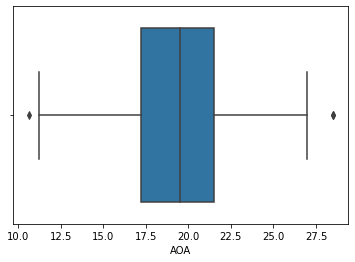

In [34]:
sns.boxplot(data.AOA)
plt.show()

In [35]:
#### after removing outlier box plot shows a outlier not handle this type of outlier

# Magnesium is normal curve so using 3 sigma rule

In [36]:
lower_limit=data.Magnesium.mean() - 3*data.Magnesium.std()#calculating lower limit
print(lower_limit)

upper_limit=data.Magnesium.mean() + 3*data.Magnesium.std()#calculating upper limit
upper_limit

56.89412248782086


142.58902357959488

In [37]:
data.loc[data['Magnesium']<lower_limit]#checking values which are less than minimum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


In [38]:
data.loc[data['Magnesium']>upper_limit]#checking values which are  greater than maximum limit

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937


In [39]:
data.loc[data['Magnesium']>upper_limit,'Magnesium']=np.mean(data.Magnesium)#imputing values using mean

In [40]:
data.loc[data['Magnesium']>upper_limit]

,wine,alcohol,M_acid,Ash,AOA,Magnesium,total_phe,Flavanoids,NOP,Proanthocyanins,color_intensity,hu,DW,Proline


<AxesSubplot:xlabel='wine', ylabel='count'>

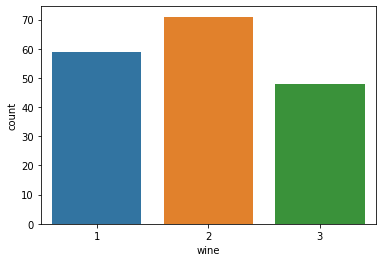

In [41]:
# Checking the balance of data.
sns.countplot(x='wine',data=data)

### Feature Selection

In [ ]:
# Remove the constant and redundant features.
data.describe()

In [ ]:
## Checking correlation

plt.figure(figsize=(30, 30))#canvas size
sns.heatmap(box.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})#plotting heat map to check correlation

### MODEL CREATION


In [42]:
# Step:1 Creating independent and dependent variable
X=data.iloc[:,1:]
y=data.wine

In [44]:
# Step:2 creating train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

# Step:3 KNN object creation
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

# Step:4 Fitting the training data
knn.fit(X_train,y_train)

# Step:5 Prediction on test data
y_hatknn = knn.predict(X_test)

### EVALUATION

In [48]:
from sklearn.metrics import classification_report,f1_score
f1 = f1_score(y_test,y_hatknn,average='weighted')
print("F1 Score:",f1)
print(classification_report(y_test,y_hatknn))

F1 Score: 0.7111111111111111
              precision    recall  f1-score   support

           1       0.87      0.87      0.87        15
           2       0.72      0.72      0.72        18
           3       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



### USE BAGGING ON KNN MODEL


In [49]:
# Step:1 Create a knn object
knn1 = KNeighborsClassifier()

# Step:2 importing the library and create a bagging object 
from sklearn.ensemble import BaggingClassifier
bagg = BaggingClassifier(base_estimator=knn1,n_estimators=50) 
#base_estimator---> algorithm which you want to pass
#n_estimotors-----> number of base learners

# Step:3 Fitting the training data
bagg.fit(X_train,y_train)


# Step:4 Prediction on test data
predict = bagg.predict(X_test)

### EVALUATION

In [52]:
f1score = f1_score(y_test,predict,average='weighted')
f1score # Score after bagging

0.7353650793650792

In [ ]:
### to get best n_estimator use hyper parameter tunning